In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dask.array as da
import os
import sys
import logging


logging.getLogger('matplotlib.font_manager').disabled = True
numba_logger = logging.getLogger('numba')
numba_logger.setLevel(logging.WARNING)

matplotlib_logger = logging.getLogger('matplotlib')
matplotlib_logger.setLevel(logging.WARNING)

src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(src_path)
sys.path.append(src_path)

from src.Analysis_GR import AnalysisManager, GR_Confirmation

/Users/ericron/Desktop/AngelFISH


Loads in the data from specified location

In [2]:
loc = None 
log_location = r'/Volumes/share/Users/Eric/GR_DUSP1_reruns' 
am = AnalysisManager(location=loc, log_location=log_location, mac=True) 

In [ ]:
# list all analysis done 
am.list_analysis_names()

# GR Experiment Analyis List

## Illumination Profile 0min Replicas
- 0min Profile: `GR_0min_Illumination_correction_profile_071725_2025-07-17`

## w/ Illumination Correction
### GR 1, 10, 100nM Dex 3hr Time-Sweep
- Replica A: `GR_wIC_A_072125_2025-07-21`
- Replica B: `GR_wIC_B_072125_2025-07-21`
- Replica C: `GR_wIC_C_072125_2025-07-22`

## w/out Illumination Correction
### GR 1, 10, 100nM Dex 3hr Time-Sweep
- Replica A: `GR_woIC_A_071825_2025-07-18`
- Replica B: `GR_woIC_B_071825_2025-07-18`
- Replica C: `GR_woIC_C_071825_2025-07-18`

In [3]:
# can filter on name and dates
am.select_analysis('GR_wIC_A_072125')
# am.select_analysis('GR_woIC_A_071825')

Does analysis/confirmation

In [4]:
# select GR conformation analysis 
GR = GR_Confirmation(am)

# am.list_datasets()

In [ ]:
# # select datasets
# cell_props = am.select_datasets('cell_properties', dtype='dataframe')
# illumination_profile = am.select_datasets('illumination_profiles', dtype='array')
# corrected_IL_profile = am.select_datasets('corrected_IL_profile', dtype='array')
# # images = am.select_datasets('images', dtype='array')
# am.close()

# print(f'Cell properties shape: {cell_props.shape}')
# print(f'Illumination profile shape: {illumination_profile.shape}')
# print(f'Corrected illumination profile shape: {corrected_IL_profile.shape}')
# # print(f'Images shape: {images.shape}')

In [ ]:
# # Save the illumination profile as a numpy array
# np.save('illumination_profile_011725.npy', IP[0])

In [5]:
# this loads the data into memory 
GR.get_data()

Opening file: /Volumes/share/smFISH_images/Eric_smFISH_images/20230516/GR_ICC_3hr_R1_1nM_120min_050823.h5
Reading DataFrame from: /Volumes/share/smFISH_images/Eric_smFISH_images/20230516/GR_ICC_3hr_R1_1nM_120min_050823.h5 -> Analysis_GR_wIC_A_072125_2025-07-21/cell_properties
Opening file: /Volumes/share/smFISH_images/Eric_smFISH_images/20230522/GR_ICC_3hr_R1_100nM_30min_050823.h5
Reading DataFrame from: /Volumes/share/smFISH_images/Eric_smFISH_images/20230522/GR_ICC_3hr_R1_100nM_30min_050823.h5 -> Analysis_GR_wIC_A_072125_2025-07-21/cell_properties
Opening file: /Volumes/share/smFISH_images/Eric_smFISH_images/20230516/GR_ICC_3hr_R1_10nM_0min_050823.h5
Reading DataFrame from: /Volumes/share/smFISH_images/Eric_smFISH_images/20230516/GR_ICC_3hr_R1_10nM_0min_050823.h5 -> Analysis_GR_wIC_A_072125_2025-07-21/cell_properties
Opening file: /Volumes/share/smFISH_images/Eric_smFISH_images/20230522/GR_ICC_3hr_R1_100nM_40min_050823.h5
Reading DataFrame from: /Volumes/share/smFISH_images/Eric_smFI

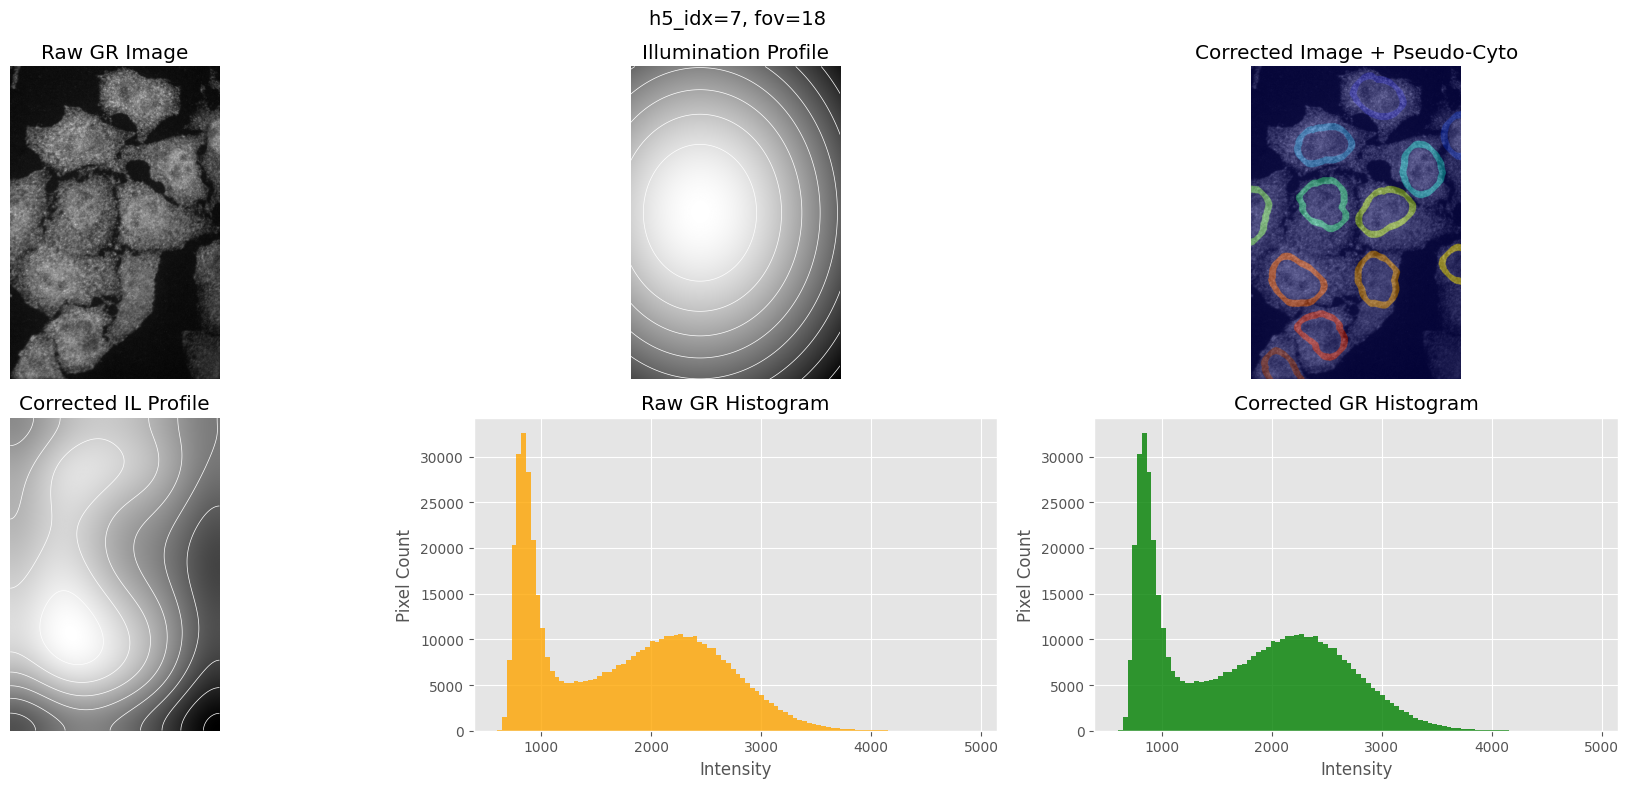

In [8]:
# run this multiple times to see a new randomly selected cell
GR.display()

In [ ]:
am.close()

In [ ]:
GR.cellprops.keys()

In [ ]:
keys_to_plot = ['nuc_area', 'nuc_intensity_mean']
channel_maps = {'-1': ' DAPI', '-0': ' GR'}
for k in GR.cellprops.keys():
    if k in keys_to_plot or k.split('-')[0] in keys_to_plot:
        # Plot histogram for 'area'
        plt.figure(figsize=(10, 5))
        plt.hist(GR.cellprops[k], bins=30, alpha=0.5, label='Area')
        plt.ylabel('Frequency')
        for suffix, channel in channel_maps.items():
            if k.endswith(suffix):
                k = k.replace(suffix, channel)
                break
        plt.title(f'Histogram of {k}')
        plt.legend()
        plt.show()

In [ ]:
# spot counts as a function of time and dex
tp_set = sorted(set(GR.cellprops['time']))
print(tp_set)
dex_set = sorted(set(GR.cellprops['Dex_Conc']))
print(dex_set)
keys_to_plot = ['nuc_area', 'nuc_intensity_mean-0']
for k in keys_to_plot:
    fig, axs = plt.subplots(len(tp_set), len(dex_set), figsize=(15, 15))
    for suffix, channel in channel_maps.items():
        if k.endswith(suffix):
            l = k.replace(suffix, channel)
            break
        else:
            l = k
    fig.suptitle(f'{l} as a function of time and dex', fontsize=16)
    for i_d, d in enumerate(dex_set):
        data = GR.cellprops[GR.cellprops['Dex_Conc'] == d]
        for i_t, t in enumerate(tp_set):
            temp = data[data['time'] == t]
            mean_val = temp[k].mean()
            std_val = temp[k].std()
            if d == 0 and t == 0:
                for ax in axs[i_t, :]:
                    ax.hist(temp[k], bins=200, density=True)
                    ax.axvline(mean_val, color='r', linestyle='solid', linewidth=2)
                    ax.axvline(mean_val + std_val, color='g', linestyle='dashed', linewidth=1)
                    ax.axvline(mean_val - std_val, color='g', linestyle='dashed', linewidth=1)
                    ax.set_xlim([0, GR.cellprops[k].max()])
                    ax.set_xticks([])
                    ax.set_yticks([])
                    ax.grid(True, axis='x', linestyle='--', linewidth=0.5)
            else:
                axs[i_t, i_d].hist(temp[k], bins=200, density=True)
                axs[i_t, i_d].axvline(mean_val, color='r', linestyle='solid', linewidth=2)
                axs[i_t, i_d].axvline(mean_val + std_val, color='g', linestyle='dashed', linewidth=1)
                axs[i_t, i_d].axvline(mean_val - std_val, color='g', linestyle='dashed', linewidth=1)
                axs[i_t, i_d].set_xlim([0, GR.cellprops[k].max()])
                axs[i_t, i_d].set_yticks([])
                axs[i_t, i_d].grid(True, axis='x', linestyle='--', linewidth=0.5)
                if i_t != len(tp_set) - 1:
                    axs[i_t, i_d].set_xticks([])
            axs[i_t, 0].set_ylabel(f'Time: {t}')
            axs[0, i_d].set_title(f'Dex: {d}')
    plt.show()



In [ ]:
GR.close()